#### Exploratory Data Analysis on IPL matches dataset(2008-2020) ####


### Importing libraries and analysing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

import warnings
warnings.filterwarnings('ignore') 

In [2]:
matches = pd.read_csv('D:/FULL STACK DATA SCIENTIST/Projects/IPL/IPL Matches 2008-2020.csv')

In [3]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
matches.shape

(816, 17)

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i


### Data Pre Processing ###


Changing DataTypes and Creating new columns

In [6]:
#converting datatype of date to datetime format
matches['date']=pd.to_datetime(matches['date'])


In [7]:
#creating new column 'day'
matches['Day']=matches['date'].dt.day

#creating new column 'month'
matches['Month']=matches['date'].dt.month

#creating new column 'Year'
matches['year']=matches['date'].dt.year

#creating new column 'weekday'
matches['weekday']=matches['date'].dt.weekday



In [8]:
matches.dtypes

id                          int64
city                       object
date               datetime64[ns]
player_of_match            object
venue                      object
neutral_venue               int64
team1                      object
team2                      object
toss_winner                object
toss_decision              object
winner                     object
result                     object
result_margin             float64
eliminator                 object
method                     object
umpire1                    object
umpire2                    object
Day                         int64
Month                       int64
year                        int64
weekday                     int64
dtype: object

 Dealing with Null Values

In [9]:
matches.isna().any()

id                 False
city                True
date               False
player_of_match     True
venue              False
neutral_venue      False
team1              False
team2              False
toss_winner        False
toss_decision      False
winner              True
result              True
result_margin       True
eliminator          True
method              True
umpire1            False
umpire2            False
Day                False
Month              False
year               False
weekday            False
dtype: bool

In [10]:
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
Day                  0
Month                0
year                 0
weekday              0
dtype: int64

In [11]:
matches[matches['city'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,Day,Month,year,weekday
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,wickets,8.0,N,NaN,Aleem Dar,S Ravi,17,4,2014,3
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,...,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary,19,4,2014,5
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,...,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni,19,4,2014,5
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,...,wickets,7.0,N,NaN,BF Bowden,M Erasmus,20,4,2014,6
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,...,runs,72.0,N,NaN,M Erasmus,S Ravi,22,4,2014,1
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,...,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth,23,4,2014,2
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni,24,4,2014,3
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,...,runs,4.0,N,NaN,M Erasmus,S Ravi,25,4,2014,4
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,...,wickets,7.0,N,NaN,BF Bowden,M Erasmus,25,4,2014,4
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,...,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni,27,4,2014,6


In [12]:
#Finding index of rows where city is null when venue is sharjah cricket stadium
matches[(matches["city"].isnull()) & (matches["venue"] == "Sharjah Cricket Stadium")].index

Int64Index([399, 404, 406, 408, 413, 414], dtype='int64')

In [13]:
# replacing null values
for j in [399, 404, 406, 408, 413, 414]:
    matches['city'][j] = 'Sharjah'


In [14]:
#Finding index of rows where city is null when venue is Dubai Cricket cricket stadium
matches[(matches['city'].isnull()) & (matches['venue'] == 'Dubai International Cricket Stadium')].index


Int64Index([402, 403, 407, 409, 410, 415, 417], dtype='int64')

In [15]:
# replacing null values
for i in [402, 403, 407, 409, 410, 415, 417]:
    matches['city'][i] = 'Dubai'

In [16]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru'],
      dtype=object)

In [17]:
matches.isnull().sum()


id                   0
city                 0
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
Day                  0
Month                0
year                 0
weekday              0
dtype: int64

In [18]:
matches[matches['player_of_match'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,Day,Month,year,weekday
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,...,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker,21,5,2011,5
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,...,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak,29,4,2015,2
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,...,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan,17,5,2015,6
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,...,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong,30,4,2019,1


In [19]:
#Finding null values from 'player_of_match' column
matches[matches['player_of_match'].isnull()].index

Int64Index([241, 486, 511, 744], dtype='int64')

In [20]:
#Dropping NaN values
matches.drop([241, 486, 511, 744],inplace=True)

In [21]:
matches.isnull().sum()

id                   0
city                 0
date                 0
player_of_match      0
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               0
result               0
result_margin       13
eliminator           0
method             793
umpire1              0
umpire2              0
Day                  0
Month                0
year                 0
weekday              0
dtype: int64

In [22]:
matches[matches['result_margin'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,Day,Month,year,weekday
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,...,tie,NaN,Y,NaN,MR Benson,M Erasmus,23,4,2009,3
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,...,tie,NaN,Y,NaN,K Hariharan,DJ Harper,21,3,2010,6
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,...,tie,NaN,Y,NaN,AK Chaudhary,S Ravi,7,4,2013,6
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,...,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni,16,4,2013,1
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,...,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary,29,4,2014,1
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,...,tie,NaN,Y,NaN,M Erasmus,S Ravi,21,4,2015,1
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,...,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney,29,4,2017,5
705,1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,...,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon,30,3,2019,5
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,...,tie,NaN,Y,NaN,CK Nandan,S Ravi,2,5,2019,3
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,...,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon,20,9,2020,6


In [23]:
#Filling NaN Values
matches['result_margin'].fillna( 0 , inplace=True) 

In [24]:
matches.isnull().sum()

id                   0
city                 0
date                 0
player_of_match      0
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               0
result               0
result_margin        0
eliminator           0
method             793
umpire1              0
umpire2              0
Day                  0
Month                0
year                 0
weekday              0
dtype: int64

In [25]:
matches['method'].unique()

array([nan, 'D/L'], dtype=object)

In [26]:
#Filling NaN Values
matches['method'].fillna('Usual method' , inplace=True)

In [27]:
matches.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
Day                0
Month              0
year               0
weekday            0
dtype: int64

In [28]:
matches.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [29]:
# Replacing the "M.Chinnaswamy Stadium" by "M Chinnaswamy Stadium"
for i in matches['venue']:
    if i == 'M.Chinnaswamy Stadium':
        matches['venue'].replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium',inplace=True)

In [30]:
matches.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [31]:
matches.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
Day                0
Month              0
year               0
weekday            0
dtype: int64

### Questions

 How many matches played as per the dataset?

In [32]:
matches.id.count()

812

How many IPL season's data we have ?

In [33]:
matches['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int64)

In [34]:
matches['year'].nunique()

13

In [35]:
# Adding new column 'Season'
matches['season']=matches['year']

In [36]:
matches.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'Day',
       'Month', 'year', 'weekday', 'season'],
      dtype='object')

In [37]:
# Creating the list of season number
Season_Number = []
for i in matches["year"]:
  if i == 2008:
    Season_Number.append(1)
  elif i == 2009:
    Season_Number.append(2)
  elif i == 2010:
    Season_Number.append(3)
  elif i == 2011:
    Season_Number.append(4)
  elif i == 2012:
    Season_Number.append(5)
  elif i == 2013:
    Season_Number.append(6)
  elif i == 2014:
    Season_Number.append(7)
  elif i == 2015:
    Season_Number.append(8)
  elif i == 2016:
    Season_Number.append(9)
  elif i == 2017:
    Season_Number.append(10)
  elif i == 2018:
    Season_Number.append(11)
  elif i == 2019:
    Season_Number.append(12)
  elif i == 2020:
    Season_Number.append(13)

In [38]:
matches['Season_Number']=Season_Number

In [39]:
matches.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'Day',
       'Month', 'year', 'weekday', 'season', 'Season_Number'],
      dtype='object')

Get the details of the match won by the maximum margin of runs?:

In [40]:
matches.loc[matches["result_margin"].idxmax()]

id                             1082635
city                             Delhi
date               2017-05-06 00:00:00
player_of_match            LMP Simmons
venue                 Feroz Shah Kotla
neutral_venue                        0
team1                 Delhi Daredevils
team2                   Mumbai Indians
toss_winner           Delhi Daredevils
toss_decision                    field
winner                  Mumbai Indians
result                            runs
result_margin                    146.0
eliminator                           N
method                    Usual method
umpire1                    Nitin Menon
umpire2                      CK Nandan
Day                                  6
Month                                5
year                              2017
weekday                              5
season                            2017
Season_Number                       10
Name: 620, dtype: object

Which season consisted of the highest number of matches ever played?

In [41]:
matches.season.value_counts().sort_values(ascending = False )

2013    76
2012    74
2011    72
2010    60
2014    60
2016    60
2018    60
2020    60
2017    59
2019    59
2008    58
2009    57
2015    57
Name: season, dtype: int64

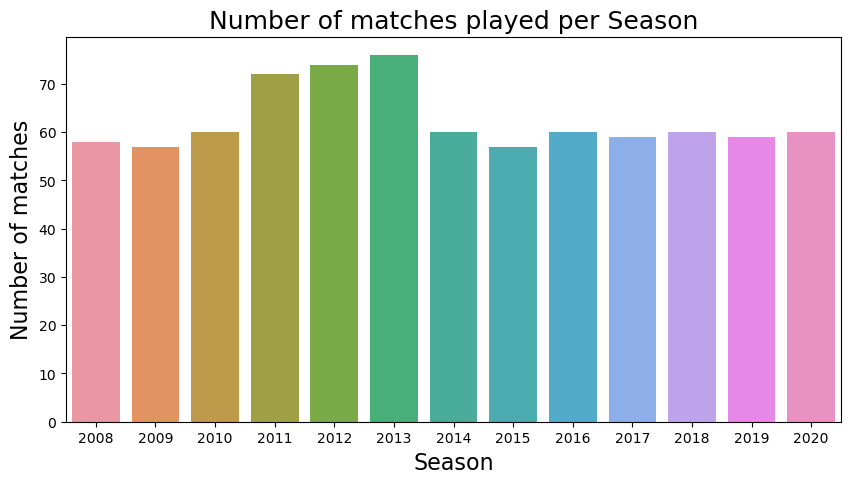

In [42]:
plt.figure(figsize = (10,5))
sns.countplot(matches.season)
plt.xlabel("Season", fontsize = 16)
plt.ylabel("Number of matches",fontsize = 16 )
plt.title("Number of matches played per Season", fontsize = 18)
plt.show()

Find the number of matches played by each team ?

In [43]:
# Creating the variable list as team_matches and converting that into Series
team_matches = list(matches["team1"]) + list(matches["team2"])
team_matches = pd.Series(team_matches)
team_matches = pd.DataFrame(team_matches)
# Number of matches played by each team
team_matches.value_counts().sort_values(ascending = False)

Mumbai Indians                 203
Kolkata Knight Riders          192
Royal Challengers Bangalore    192
Kings XI Punjab                190
Chennai Super Kings            178
Delhi Daredevils               159
Rajasthan Royals               159
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   45
Delhi Capitals                  33
Gujarat Lions                   30
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

In [44]:
def Total_match(team_name):
  count_match1 = 0
  for i in matches["team1"]:
    if i == team_name:
      count_match1 += 1
  

  count_match2 = 0
  for j in matches["team2"]:
    if j == team_name:
      count_match2 += 1
 

  print(count_match1  + count_match2)


In [45]:
Total_match('Mumbai Indians')

203


Which is the most successful team?

In [46]:
matches.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace = True)

In [47]:
matches.replace('Delhi Daredevils', 'Delhi Capitals', inplace = True)

In [48]:
matches.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [49]:
matches.team2.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Capitals', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Gujarat Lions'], dtype=object)

In [50]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,eliminator,method,umpire1,umpire2,Day,Month,year,weekday,season,Season_Number
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,N,Usual method,Asad Rauf,RE Koertzen,18,4,2008,4,2008,1
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,N,Usual method,MR Benson,SL Shastri,19,4,2008,5,2008,1
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,...,N,Usual method,Aleem Dar,GA Pratapkumar,19,4,2008,5,2008,1
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,N,Usual method,SJ Davis,DJ Harper,20,4,2008,6,2008,1
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,...,N,Usual method,BF Bowden,K Hariharan,20,4,2008,6,2008,1


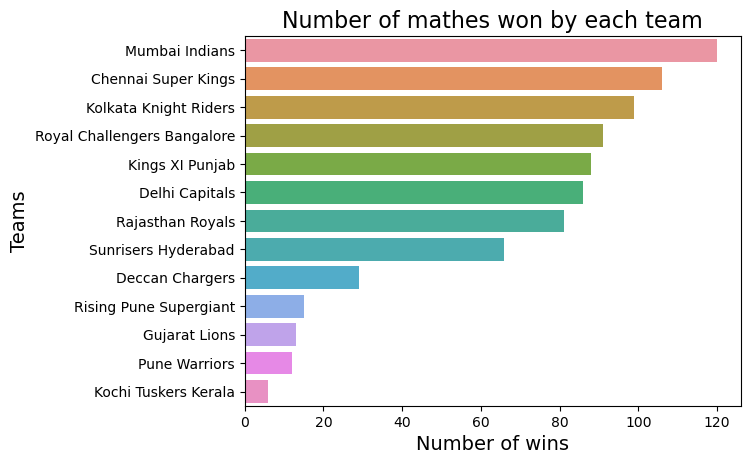

In [51]:
sns.barplot( x = matches.winner.value_counts(), y = matches.winner.value_counts().index)
plt.xlabel("Number of wins", fontsize = 14)
plt.ylabel("Teams",fontsize = 14)
plt.title("Number of mathes won by each team", fontsize = 16)
plt.show()

 Get the Highest wins by teams per season

In [52]:
matches.groupby(['Season_Number'])['winner'].value_counts()

Season_Number  winner                     
1              Rajasthan Royals               13
               Kings XI Punjab                10
               Chennai Super Kings             9
               Delhi Capitals                  7
               Mumbai Indians                  7
                                              ..
13             Kolkata Knight Riders           7
               Royal Challengers Bangalore     7
               Chennai Super Kings             6
               Kings XI Punjab                 6
               Rajasthan Royals                6
Name: winner, Length: 108, dtype: int64

Find top ten players who got maximum number of player of the match?

In [53]:
matches.player_of_match.value_counts().sort_values(ascending = False)[:10]

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: player_of_match, dtype: int64

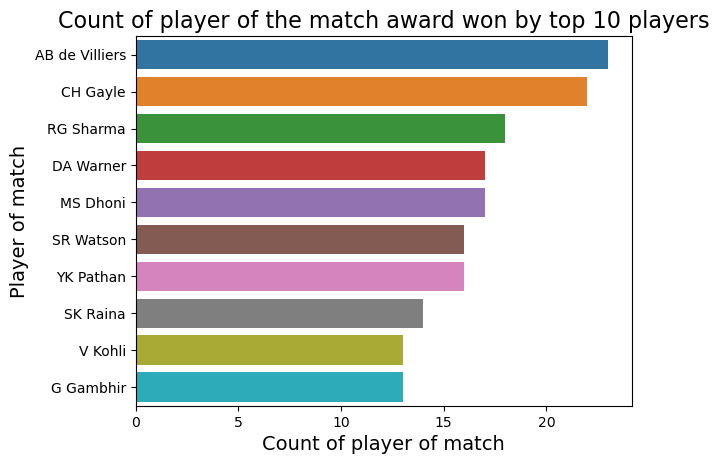

In [54]:
sns.barplot( x = matches["player_of_match"].value_counts(ascending = False)[:10], y =matches["player_of_match"].value_counts(ascending = False)[:10].index)
plt.xlabel("Count of player of match", fontsize = 14)
plt.ylabel("Player of match", fontsize = 14)
plt.title("Count of player of the match award won by top 10 players", fontsize = 16)
plt.show()

How many number of matches played per city

In [55]:
matches["city"].value_counts().sort_values(ascending = False)

Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Dubai              33
Abu Dhabi          29
Sharjah            18
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Cuttack             7
Ranchi              7
Port Elizabeth      7
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

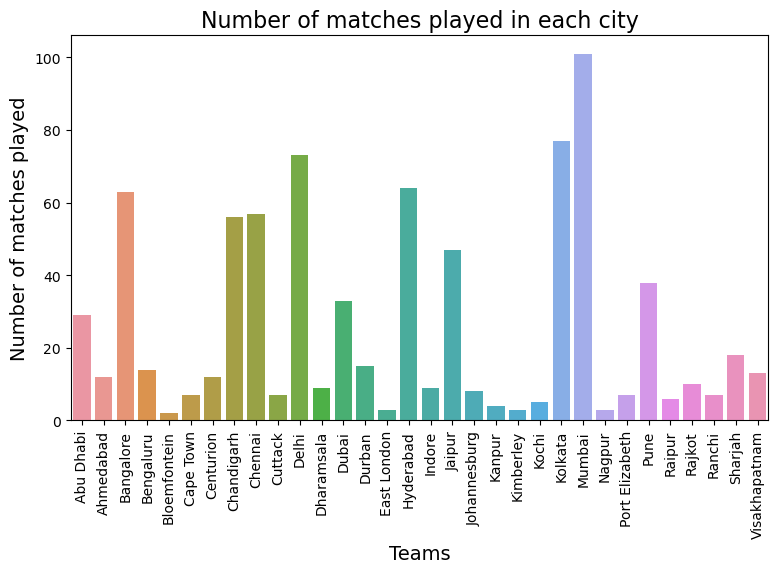

In [56]:
plt.figure(figsize=(9,5))
sns.countplot(matches["city"].sort_values(ascending = True ))  # Sorting based on City names
plt.xticks(rotation = 90)
plt.xlabel("Teams", fontsize = 14)
plt.ylabel("Number of matches played", fontsize = 14)
plt.title("Number of matches played in each city", fontsize = 16)
plt.show()

Compare the matches played and won for each team.

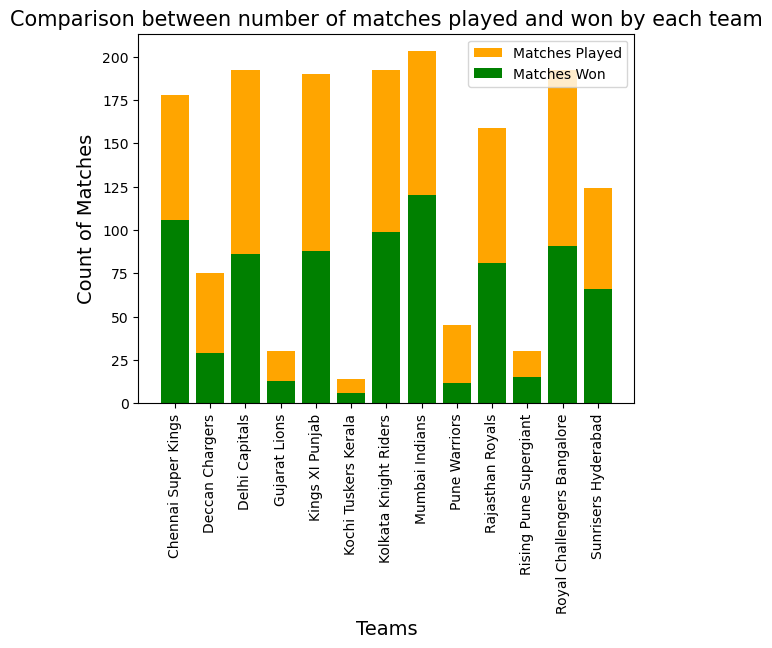

In [57]:
matches_played = matches['team1'].value_counts() + matches['team2'].value_counts()
matches_won = matches['winner'].value_counts()

# Create a bar chart of the number of matches played and won by each team
fig, ax = plt.subplots()
ax.bar(matches_played.index, matches_played.values, color='orange', label='Matches Played')
ax.bar(matches_won.index, matches_won.values, color='green', label='Matches Won')

# Customize the chart with axis labels, title, and legend
plt.xticks(rotation=90)
ax.set_xlabel('Teams', fontsize=14)
ax.set_ylabel('Count of Matches', fontsize=14)
ax.set_title('Comparison between number of matches played and won by each team', fontsize=15)
ax.legend()

# Show the chart
plt.show()

Get team's winning proportion for each Year

year : 2008 -------------------------------------------


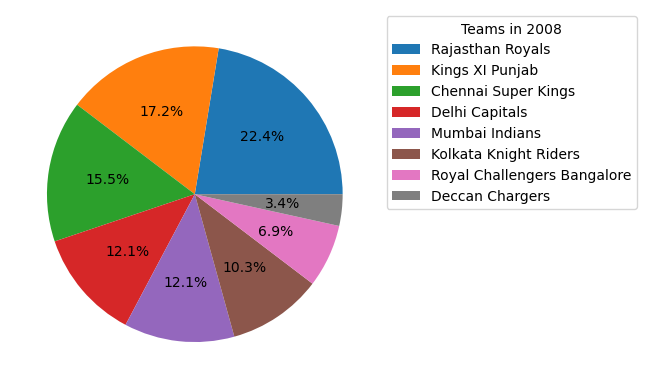

year : 2009 -------------------------------------------


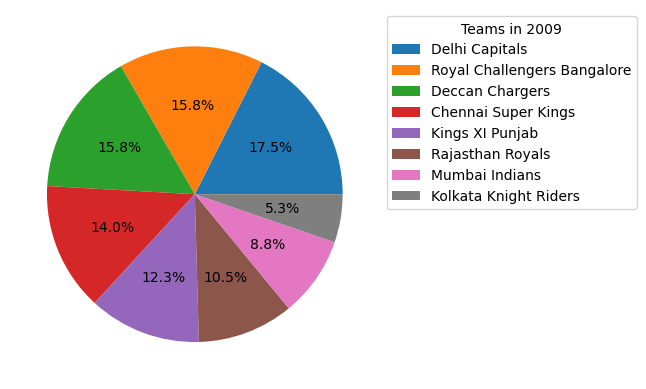

year : 2010 -------------------------------------------


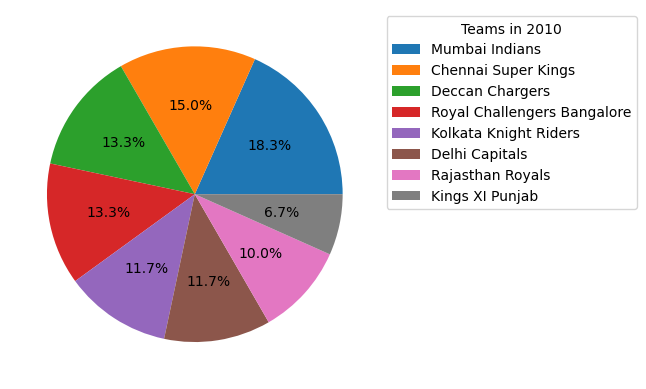

year : 2011 -------------------------------------------


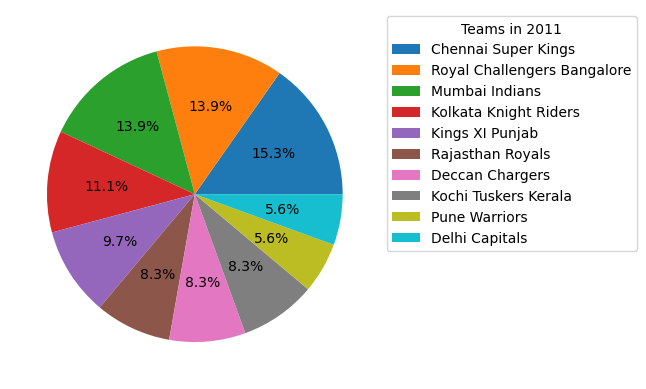

year : 2012 -------------------------------------------


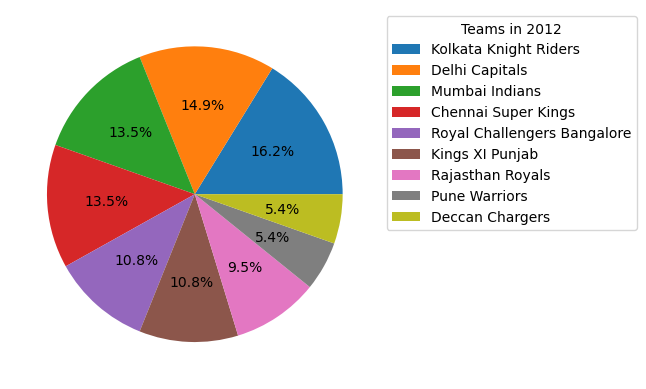

year : 2013 -------------------------------------------


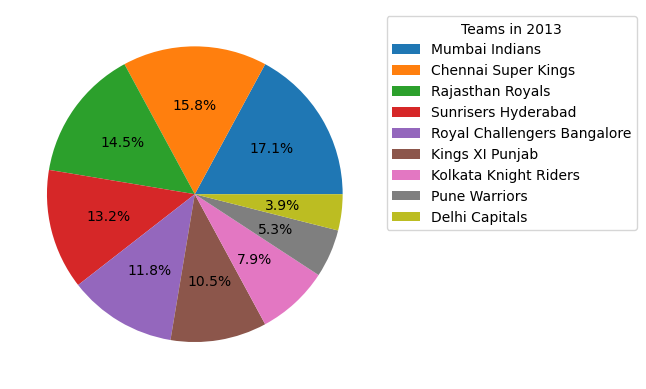

year : 2014 -------------------------------------------


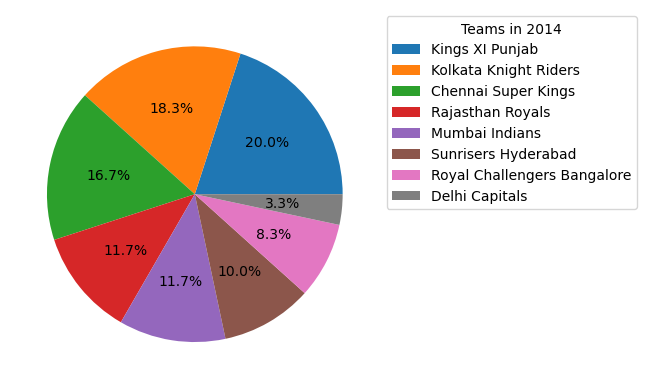

year : 2015 -------------------------------------------


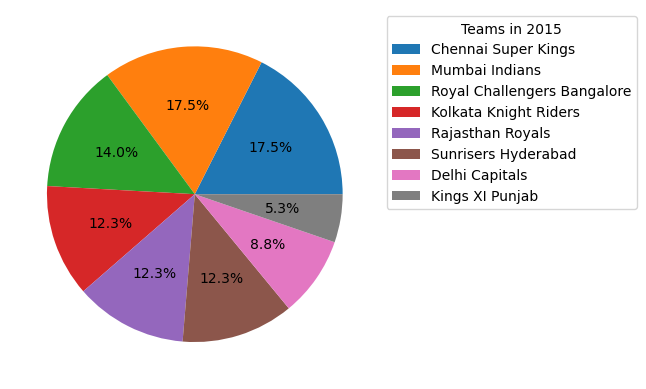

year : 2016 -------------------------------------------


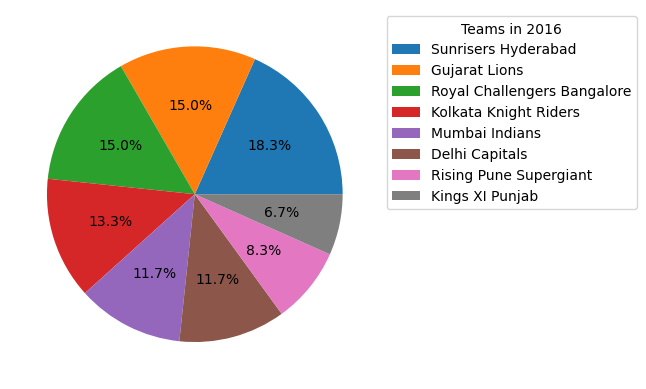

year : 2017 -------------------------------------------


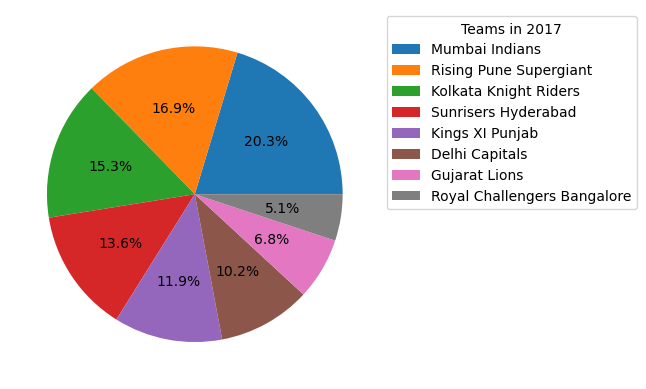

year : 2018 -------------------------------------------


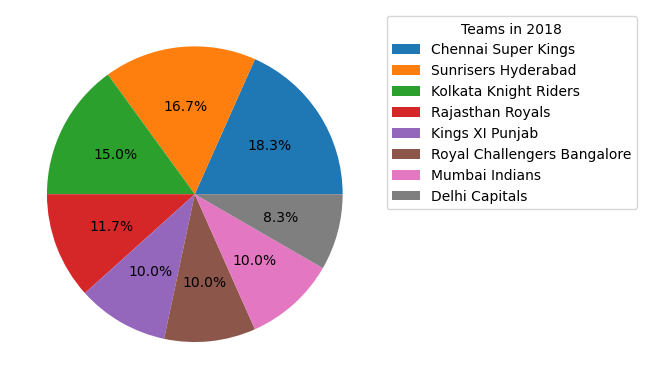

year : 2019 -------------------------------------------


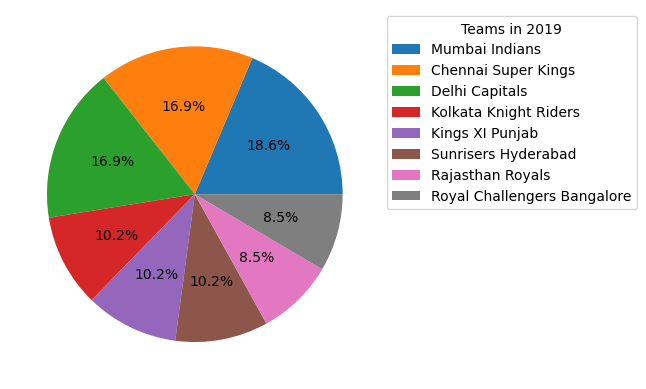

year : 2020 -------------------------------------------


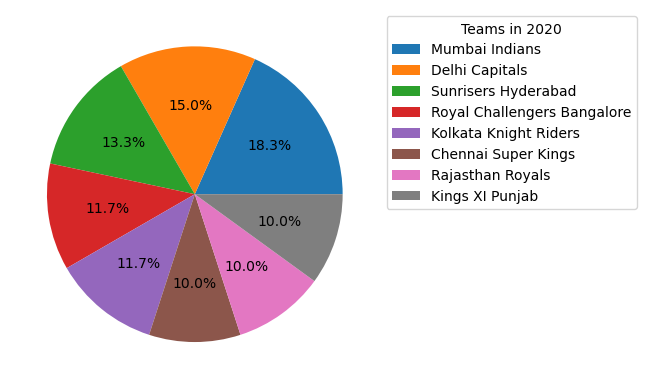

In [58]:
for i in matches.year.unique():
  print("year :", i,"-------------------------------------------")
  plt.pie(matches[matches["year"]== i]["winner"].value_counts(), autopct = "%1.1f%%")
  plt.legend(matches[matches["year"]== i]["winner"].value_counts().index, bbox_to_anchor = (1,1),title='Teams in {}'.format(i) ) # The bbox_to_anchor argument is used to specify the precise placement of the legend.
  plt.show()

Get the percentage of wins for each team in all the venues

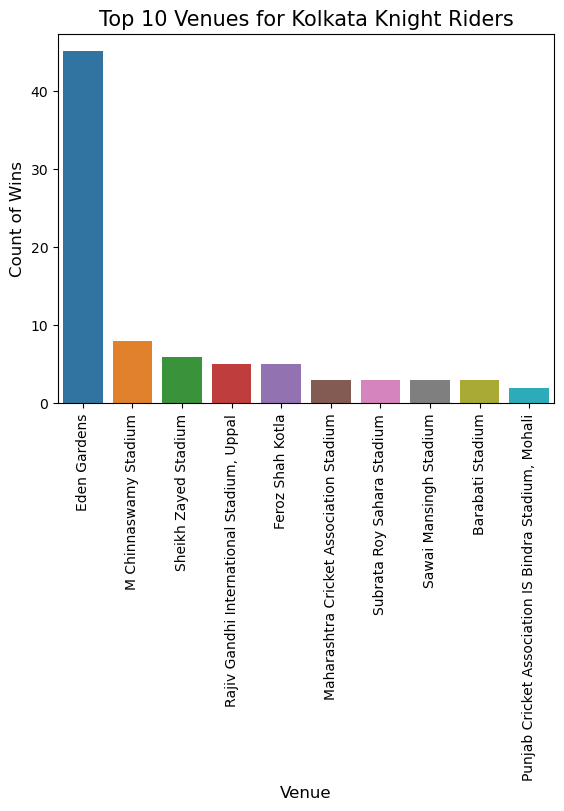

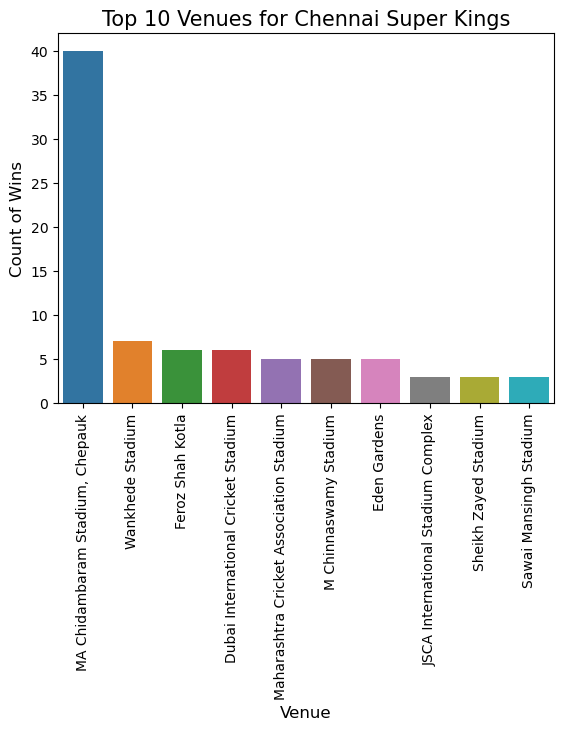

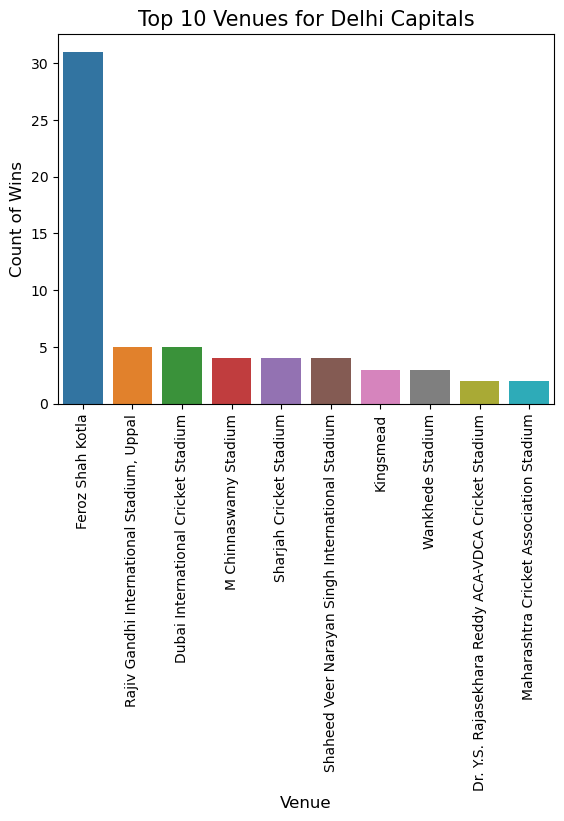

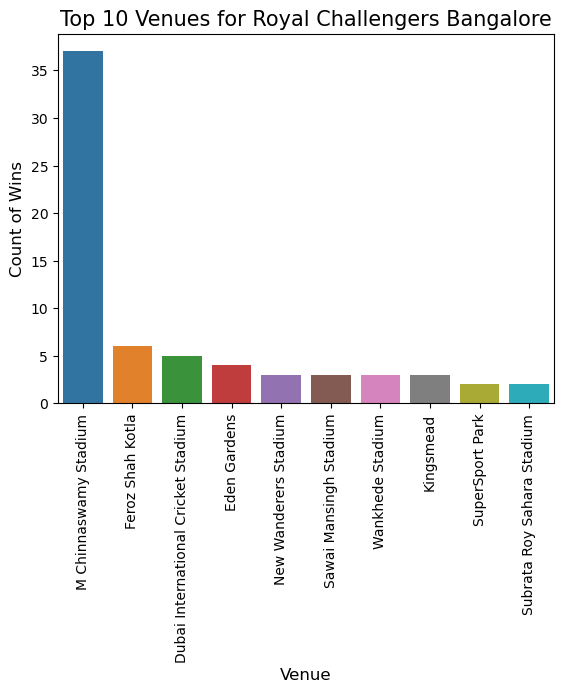

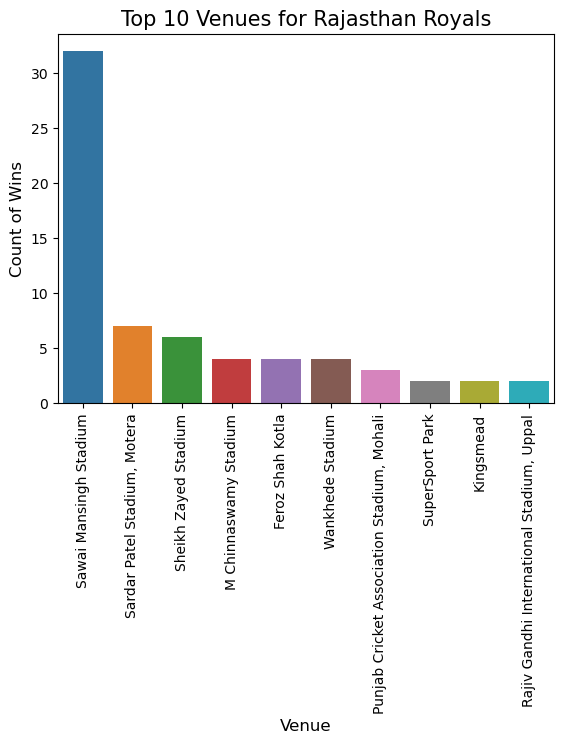

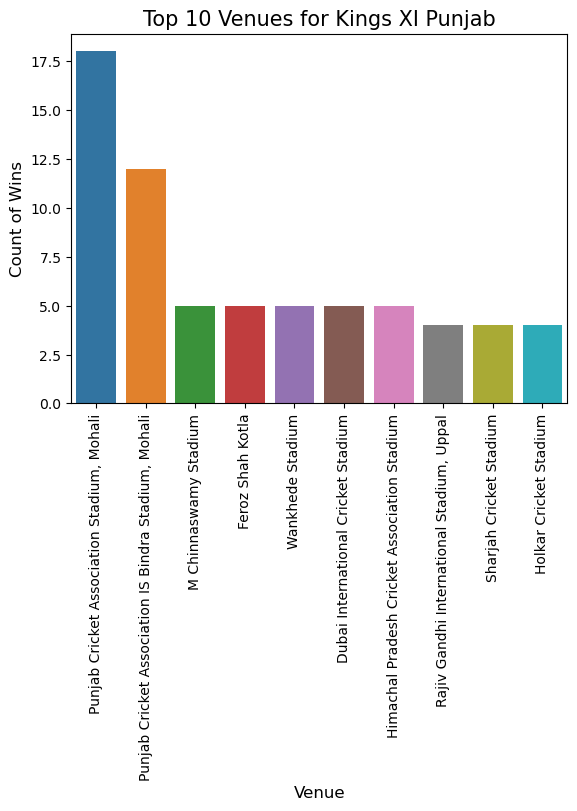

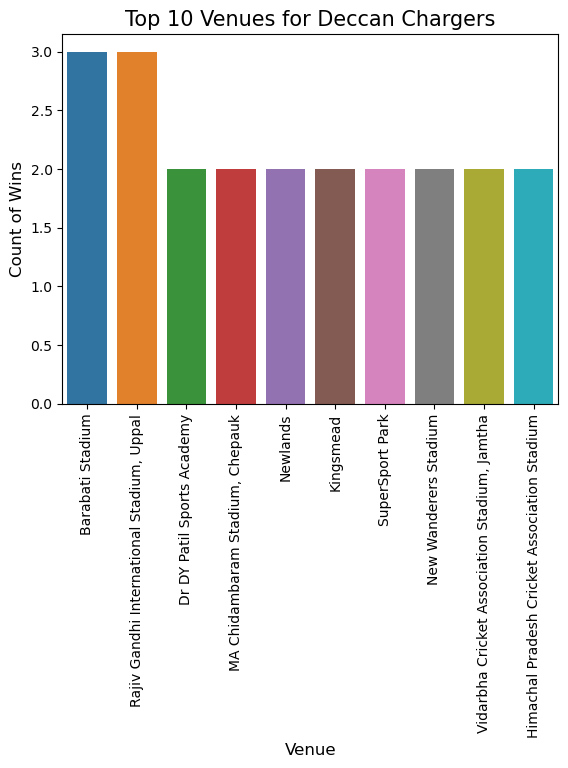

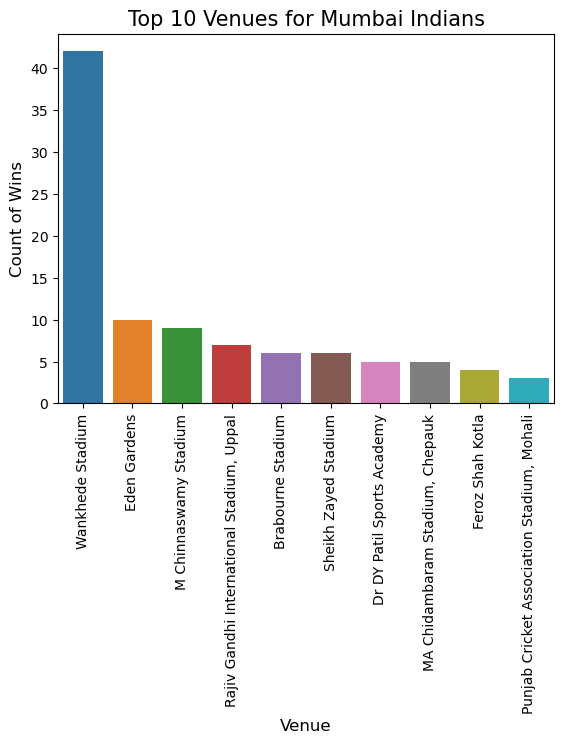

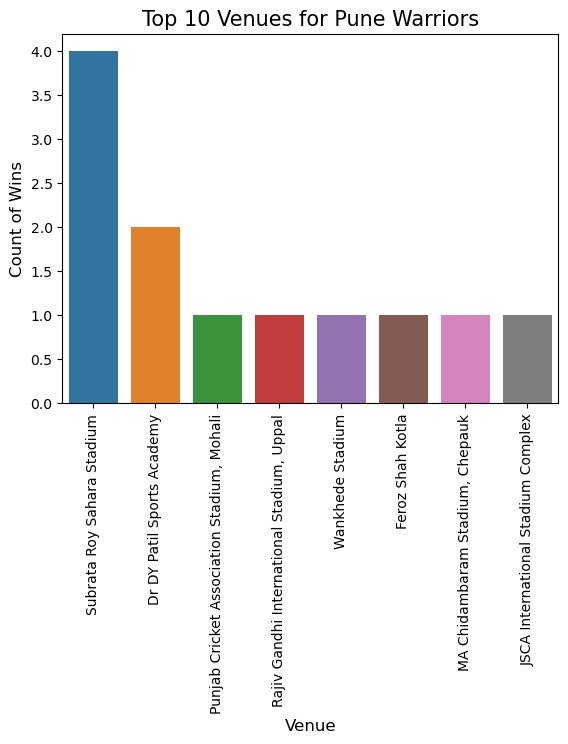

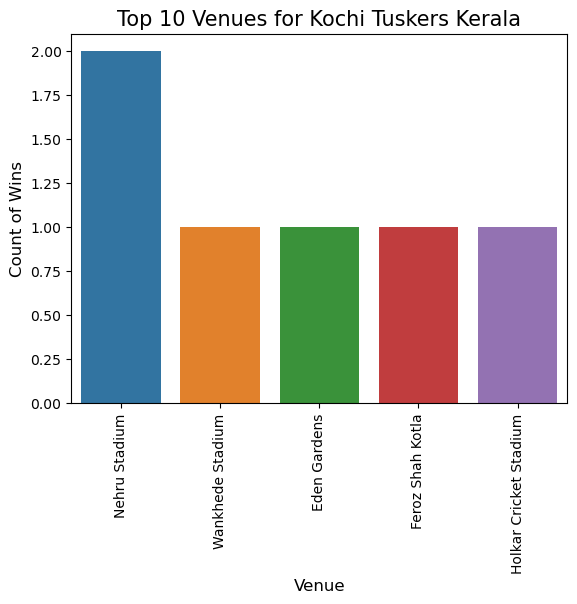

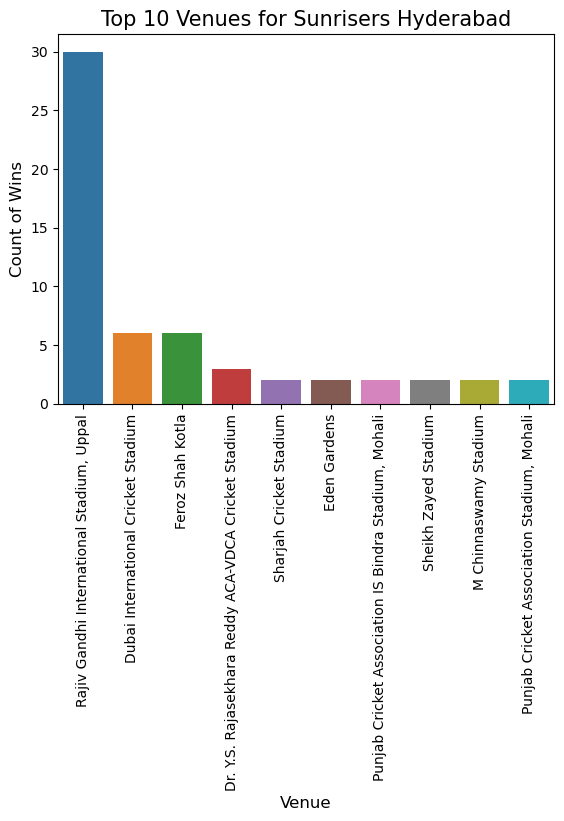

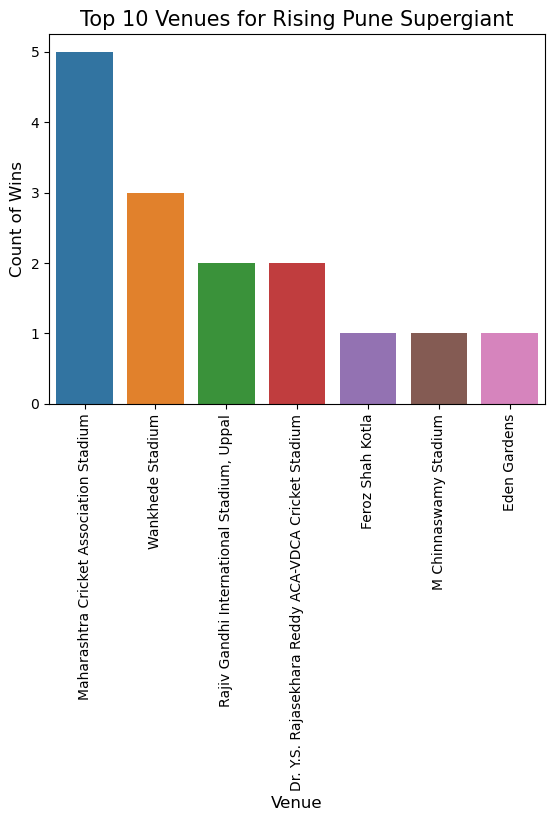

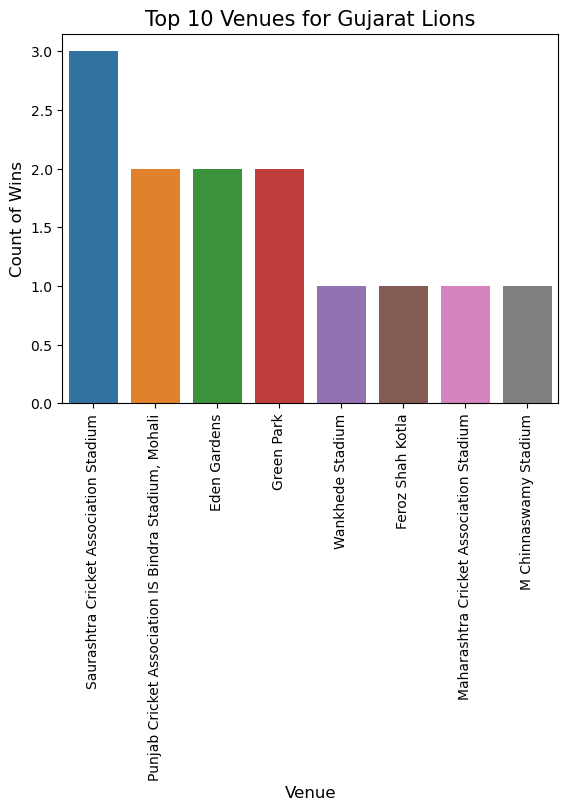

In [59]:
for team in matches['winner'].unique():
    # Filter the data for the current team
    team_matches = matches[matches['winner'] == team]
    # Get the top 10 venues for the current team
    top_venues = team_matches['venue'].value_counts()[:10]
    # Plot a bar chart of the top 10 venues for the current team
    sns.barplot(x=top_venues.index, y=top_venues.values)
    plt.title(f"Top 10 Venues for {team}", fontsize=15)
    plt.xlabel('Venue', fontsize=12)
    plt.ylabel('Count of Wins', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

Does playing at home grounds has any impact on winning the game?

In [60]:
homeground={}
for i in matches.winner.unique():
    homeground[i]=matches[matches.winner==i].venue.value_counts().head(1).index[0]

In [61]:
homeground

{'Kolkata Knight Riders': 'Eden Gardens',
 'Chennai Super Kings': 'MA Chidambaram Stadium, Chepauk',
 'Delhi Capitals': 'Feroz Shah Kotla',
 'Royal Challengers Bangalore': 'M Chinnaswamy Stadium',
 'Rajasthan Royals': 'Sawai Mansingh Stadium',
 'Kings XI Punjab': 'Punjab Cricket Association Stadium, Mohali',
 'Deccan Chargers': 'Barabati Stadium',
 'Mumbai Indians': 'Wankhede Stadium',
 'Pune Warriors': 'Subrata Roy Sahara Stadium',
 'Kochi Tuskers Kerala': 'Nehru Stadium',
 'Sunrisers Hyderabad': 'Rajiv Gandhi International Stadium, Uppal',
 'Rising Pune Supergiant': 'Maharashtra Cricket Association Stadium',
 'Gujarat Lions': 'Saurashtra Cricket Association Stadium'}

In [62]:
# Gives number of matches played by each team on their homeground
matches_played_homeground={}
for i in homeground:
    matches_played_homeground[i]=len(matches[matches.venue==homeground[i]])

In [63]:
matches_played_homeground

{'Kolkata Knight Riders': 77,
 'Chennai Super Kings': 57,
 'Delhi Capitals': 73,
 'Royal Challengers Bangalore': 77,
 'Rajasthan Royals': 47,
 'Kings XI Punjab': 35,
 'Deccan Chargers': 7,
 'Mumbai Indians': 73,
 'Pune Warriors': 17,
 'Kochi Tuskers Kerala': 5,
 'Sunrisers Hyderabad': 64,
 'Rising Pune Supergiant': 21,
 'Gujarat Lions': 10}

In [64]:
# Gives the number of matches won by each team on their homeground
matches_won_homeground={}
for i in homeground:
    matches_won_homeground[i]=len(matches.loc[(matches['venue']==homeground[i]) & (matches['winner']==i)])

In [65]:
matches_won_homeground

{'Kolkata Knight Riders': 45,
 'Chennai Super Kings': 40,
 'Delhi Capitals': 31,
 'Royal Challengers Bangalore': 37,
 'Rajasthan Royals': 32,
 'Kings XI Punjab': 18,
 'Deccan Chargers': 3,
 'Mumbai Indians': 42,
 'Pune Warriors': 4,
 'Kochi Tuskers Kerala': 2,
 'Sunrisers Hyderabad': 30,
 'Rising Pune Supergiant': 5,
 'Gujarat Lions': 3}

In [66]:
# Success percentage of each team on their homeground
success_percentage={}
for i in homeground:
    success_percentage[i]=(matches_won_homeground[i]/matches_played_homeground [i])*100
success_percentage

{'Kolkata Knight Riders': 58.44155844155844,
 'Chennai Super Kings': 70.17543859649122,
 'Delhi Capitals': 42.465753424657535,
 'Royal Challengers Bangalore': 48.05194805194805,
 'Rajasthan Royals': 68.08510638297872,
 'Kings XI Punjab': 51.42857142857142,
 'Deccan Chargers': 42.857142857142854,
 'Mumbai Indians': 57.534246575342465,
 'Pune Warriors': 23.52941176470588,
 'Kochi Tuskers Kerala': 40.0,
 'Sunrisers Hyderabad': 46.875,
 'Rising Pune Supergiant': 23.809523809523807,
 'Gujarat Lions': 30.0}

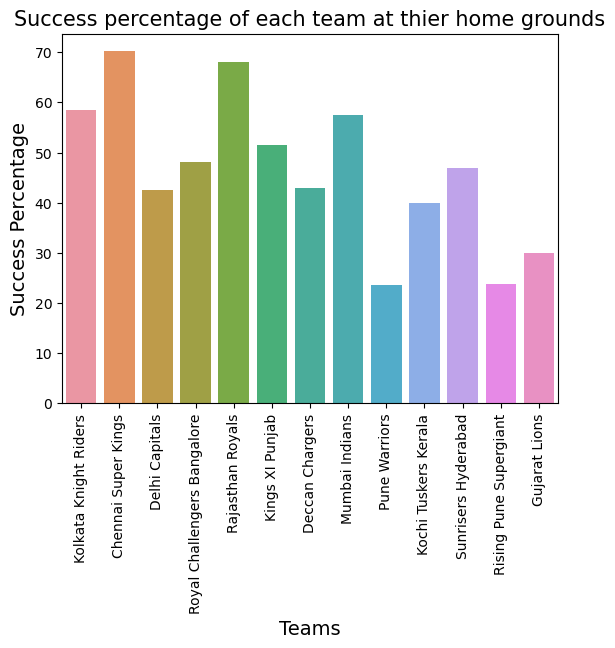

In [67]:
# assigning values to the variables
teams = list(success_percentage.keys())
success_percentage = list(success_percentage.values())


# plotting barplot of Success_percentage with above values
sns.barplot(teams,success_percentage)
plt.xticks(rotation=90)
plt.xlabel("Teams", fontsize = 14)
plt.ylabel("Success Percentage", fontsize = 14)
plt.title("Success percentage of each team at thier home grounds", fontsize = 15)
plt.show()


Does winning toss increases the chances of winning the match?

Possibility of winning the match after winning toss:  51.48 %


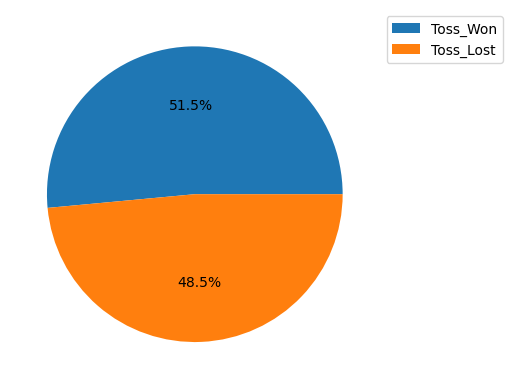

In [68]:
x = len(matches[matches["winner"]== matches["toss_winner"]]) # Number of matches won by teams when they won toss
y = len(matches)  # Total number of matches
print("Possibility of winning the match after winning toss: ", round(x/y*100, 2),"%")
plt.pie([x, y-x], autopct = "%1.1f%%")
plt.legend(["Toss_Won","Toss_Lost"], bbox_to_anchor = (1,1,))
plt.show()

Winning percentage of team when the team elect to bat first:  45.45454545454545


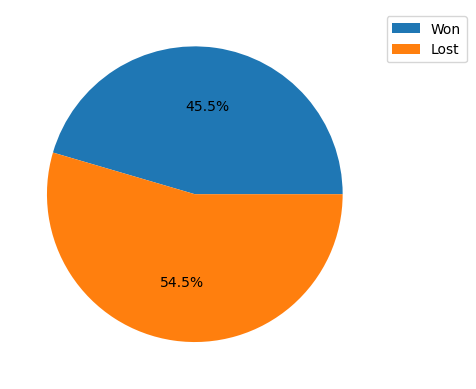

In [69]:
# When won the toss and elected to Bat first
x_bat_winner = len(matches[(matches["winner"]==matches["toss_winner"]) & (matches["toss_decision"]== "bat")])
y_bat = len(matches[matches["toss_decision"] == "bat"])
print("Winning percentage of team when the team elect to bat first: ",x_bat_winner/y_bat*100)

plt.pie([x_bat_winner, y_bat -x_bat_winner ], autopct = "%1.1f%%")
plt.legend(["Won", "Lost"], bbox_to_anchor = (1,1))
plt.show()

Winning percentage of team when the team elect to field first:  55.375253549695735


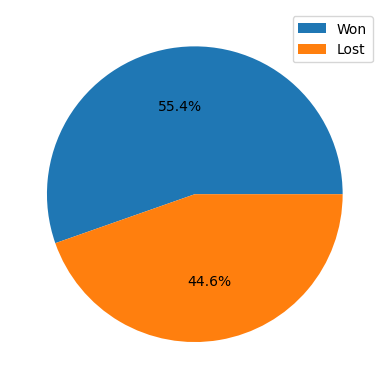

In [70]:
# When won the toss and elected to Field first
x_field_winner = len(matches[(matches["winner"]==matches["toss_winner"]) & (matches["toss_decision"]== "field")])
y_field = len(matches[matches["toss_decision"] == "field"])
print("Winning percentage of team when the team elect to field first: ",x_field_winner/y_field*100)

plt.pie([x_field_winner, y_field - x_field_winner ], autopct = "%1.1f%%")
plt.legend(["Won", "Lost"], bbox_to_anchor = (1,1), loc = "upper right")
plt.show()